In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
with open("cbow_model.pkl", "rb") as f:
    cbow_model = pickle.load(f)
with open("ngram_model.pkl", "rb") as f:
    ngram_model = pickle.load(f)

In [ ]:
W_emb_cbow = cbow_model["W_embed"]
W_out_cbow = cbow_model["W_out"]
b_out_cbow = cbow_model["b_out"]
word2idx_cbow = cbow_model["word2idx"]
idx2label_cbow = cbow_model["idx2label"]
label2idx_cbow = {}
for idx, label in idx2label_cbow.items():
    label2idx_cbow[label] = idx


{'차량 조작 지시': 0, '차량 상태 피드백': 1, '타이어 관련': 2, '전략 및 계획': 3, '트랙/상대 정보': 4, '감성/개인 표현': 5, '시스템/하드웨어 문제': 6, '데이터 피드백/비교': 7}


In [ ]:
W_ngram = ngram_model["W"]
b_ngram = ngram_model["b"]
label2idx_ngram = ngram_model["label2idx"]
idx2label_ngram = ngram_model["idx2label"]
vocab_ngram = ngram_model["vocab"]
ngram_range = ngram_model["ngram_range"]

{'감성/개인 표현': 0, '전략 및 계획': 1, '트랙/상대 정보': 2, '데이터 피드백/비교': 3, '차량 조작 지시': 4, '시스템/하드웨어 문제': 5, '타이어 관련': 6, '차량 상태 피드백': 7}


In [ ]:
def evaluate_model(X_test, y_test, W, b):
    logits = np.dot(X_test, W) + b
    probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    preds = np.argmax(probs, axis=1)
    accuracy = np.mean(preds == y_test)
    return accuracy, preds


In [ ]:
def vectorize_cbow(texts, word2idx):
    vocab_size = len(word2idx)
    vectors = []
    for text in texts:
        tokens = text.lower().split()
        vec = np.zeros(vocab_size)
        for token in tokens:
            if token in word2idx:
                vec[word2idx[token]] += 1
        if len(tokens) > 0:
            vec /= len(tokens)
        vectors.append(vec)
    return np.array(vectors)


In [12]:
def vectorize_ngram(texts, vocab, ngram_range):
    vectors = []
    for text in texts:
        vec = np.zeros(len(vocab))
        tokens = re.findall(r'\b\w+\b', text.lower())
        for n in range(ngram_range[0], ngram_range[1] + 1):
            ngrams = [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
            for ngram in ngrams:
                if ngram in vocab:
                    vec[vocab[ngram]] += 1
        vectors.append(vec)
    return np.array(vectors)

In [ ]:

test_texts = [
    "Push harder into turn 5.",  # 차량 조작 지시
    "The tyres are overheating.",  # 차량 상태 피드백
    "Switch to medium tyres.",  # 타이어 관련
    "Box this lap for a tyre change.",  # 전략 및 계획
    "The car ahead is slowing down.",  # 트랙/상대 정보
    "What a fantastic race!",  # 감성/개인 표현
    "The engine temperature is too high.",  # 시스템/하드웨어 문제
    "We are losing 0.2 seconds in sector 3.",  # 데이터 피드백/비교
    "Stay out, we are extending the stint.",  # 전략 및 계획
    "The wind is picking up in turn 2.",  # 트랙/상대 정보
]

test_labels = [
    "차량 조작 지시", 
    "차량 상태 피드백",
    "타이어 관련",
    "전략 및 계획",
    "트랙/상대 정보",
    "감성/개인 표현",
    "시스템/하드웨어 문제",
    "데이터 피드백/비교",
    "전략 및 계획",
    "트랙/상대 정보",
]

In [26]:
X_test_cbow = vectorize_cbow(test_texts, word2idx_cbow)
y_test_cbow = np.array([label2idx_cbow[label] for label in test_labels])

X_test_ngram = vectorize_ngram(test_texts, vocab_ngram, ngram_range)
y_test_ngram = np.array([label2idx_ngram[label] for label in test_labels])

In [29]:
acc_cbow, preds_cbow = evaluate_model(X_test_cbow, y_test_cbow, np.dot(W_emb_cbow, W_out_cbow) + b_out_cbow, b_out_cbow, idx2label_cbow)
print(f"CBOW acc: {acc_cbow:.4f}")

acc_ngram, preds_ngram = evaluate_model(X_test_ngram, y_test_ngram, W_ngram, b_ngram, idx2label_ngram)
print(f"N-gram acc: {acc_ngram:.4f}")

CBOW acc: 0.4000
N-gram acc: 0.4000


In [30]:
# 打印预测结果对比
for i, (text, true_label) in enumerate(zip(test_texts, test_labels)):
    pred_cbow = idx2label_cbow[preds_cbow[i]]
    pred_ngram = idx2label_ngram[preds_ngram[i]]
    print(f"Text: {text}")
    print(f"True Label: {true_label}")
    print(f"CBOW Prediction: {pred_cbow}")
    print(f"N-gram Prediction: {pred_ngram}")
    print("-" * 50)

Text: Push harder into turn 5.
True Label: 차량 조작 지시
CBOW Prediction: 차량 조작 지시
N-gram Prediction: 차량 조작 지시
--------------------------------------------------
Text: The tyres are overheating.
True Label: 차량 상태 피드백
CBOW Prediction: 타이어 관련
N-gram Prediction: 타이어 관련
--------------------------------------------------
Text: Switch to medium tyres.
True Label: 타이어 관련
CBOW Prediction: 타이어 관련
N-gram Prediction: 타이어 관련
--------------------------------------------------
Text: Box this lap for a tyre change.
True Label: 전략 및 계획
CBOW Prediction: 차량 조작 지시
N-gram Prediction: 전략 및 계획
--------------------------------------------------
Text: The car ahead is slowing down.
True Label: 트랙/상대 정보
CBOW Prediction: 트랙/상대 정보
N-gram Prediction: 트랙/상대 정보
--------------------------------------------------
Text: What a fantastic race!
True Label: 감성/개인 표현
CBOW Prediction: 차량 조작 지시
N-gram Prediction: 차량 상태 피드백
--------------------------------------------------
Text: The engine temperature is too high.
True Label: 시스

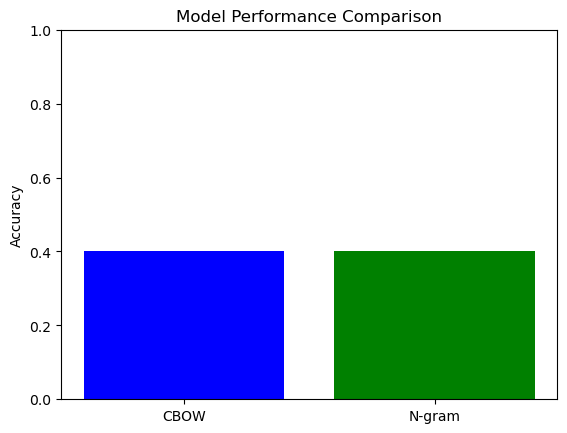

In [31]:
models = ["CBOW", "N-gram"]
accuracies = [acc_cbow, acc_ngram]

plt.bar(models, accuracies, color=["blue", "green"])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()